In [1]:
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
import wfdb

from ecg_hrv_analysis.frequency_domain import *
from ecg_hrv_analysis.plot import *
from ecg_hrv_analysis.signal_processing import *
from ecg_hrv_analysis.time_domain import *
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
data_path = pathlib.Path("./ecg_data/physionet.org/files/mitdb/1.0.0")
patient, annotations = data_dict(data_path)

In [3]:
low, high = 5, 12
rpeaks_dict, fpfn_R_an_dict, fpfn_R_R_dict = rpeaks_extr(
    patient, annotations, low, high
)

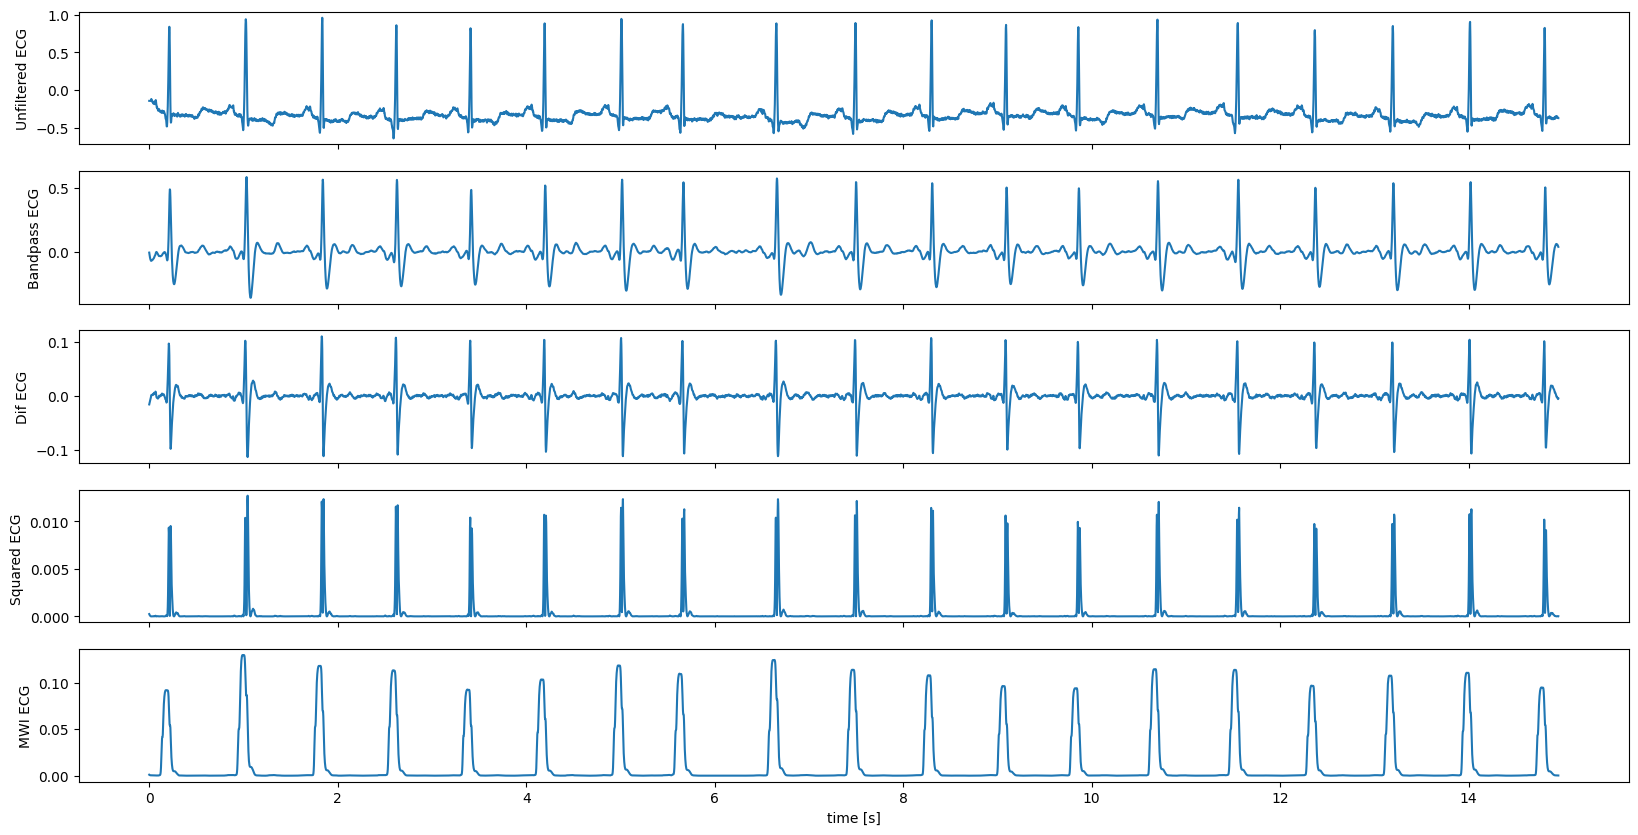

In [4]:
ind, chan = 0, 0
ecg_signals(ind, patient, chan, low, high)

In [5]:
ecg = patient[ind].get("p_signal")[:, chan]
fs = patient[ind].get("fs")
mwi_ecg, r_peaks = Pan_Tompkins(ecg, fs, low, high)

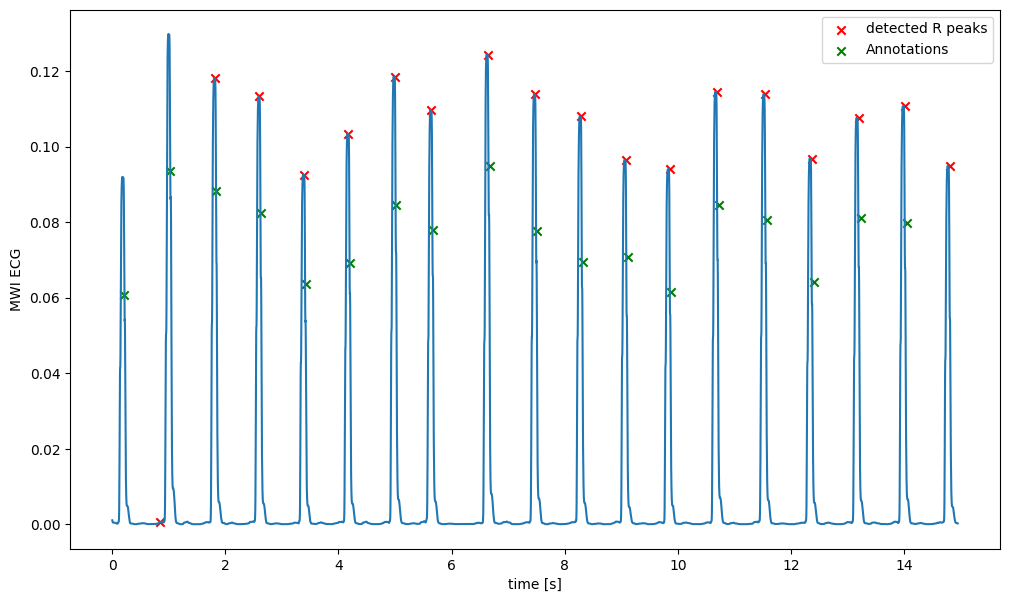

In [6]:
rpeaks_plot(r_peaks, mwi_ecg, annotations, ind)

In [7]:
sampling_rate = 360

heart_rate1 = calculate_heart_rate(r_peaks, sampling_rate)

an_peaks = annotations[ind].get("sample")
heart_rate2 = calculate_heart_rate(an_peaks, sampling_rate)

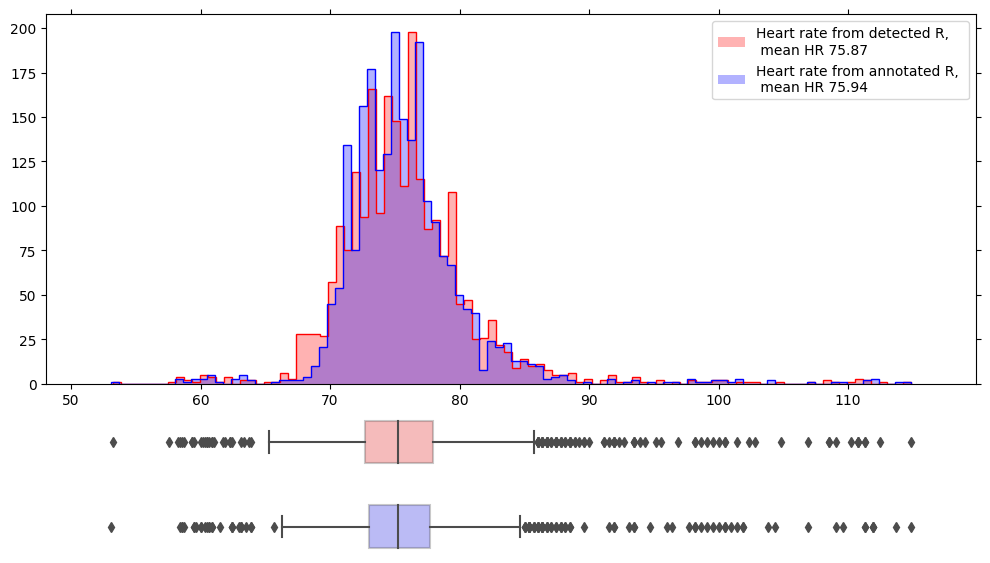

In [8]:
histogram(heart_rate1, heart_rate2)

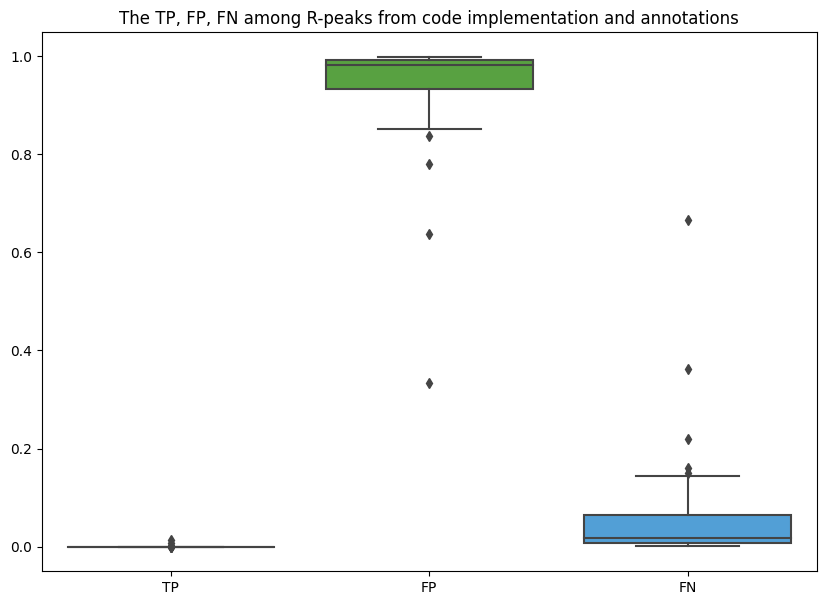

In [9]:
avg_dict = avg_fpfn(fpfn_R_an_dict, patient)
tpfpfn_plot(avg_dict)

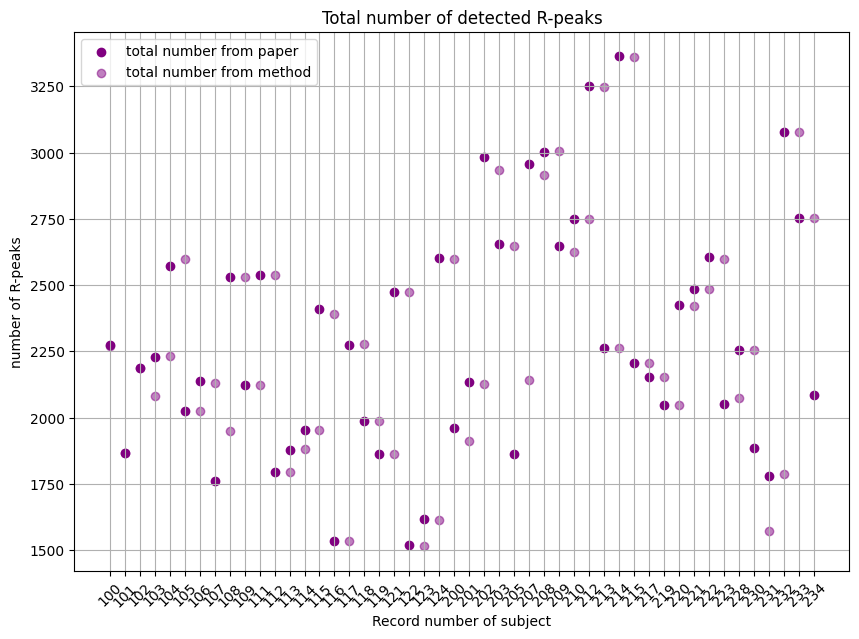

In [10]:
r_total(rpeaks_dict, patient, annotations)

In [11]:
mean_hr = mean_heart_rate(rpeaks_dict, sampling_rate=360)

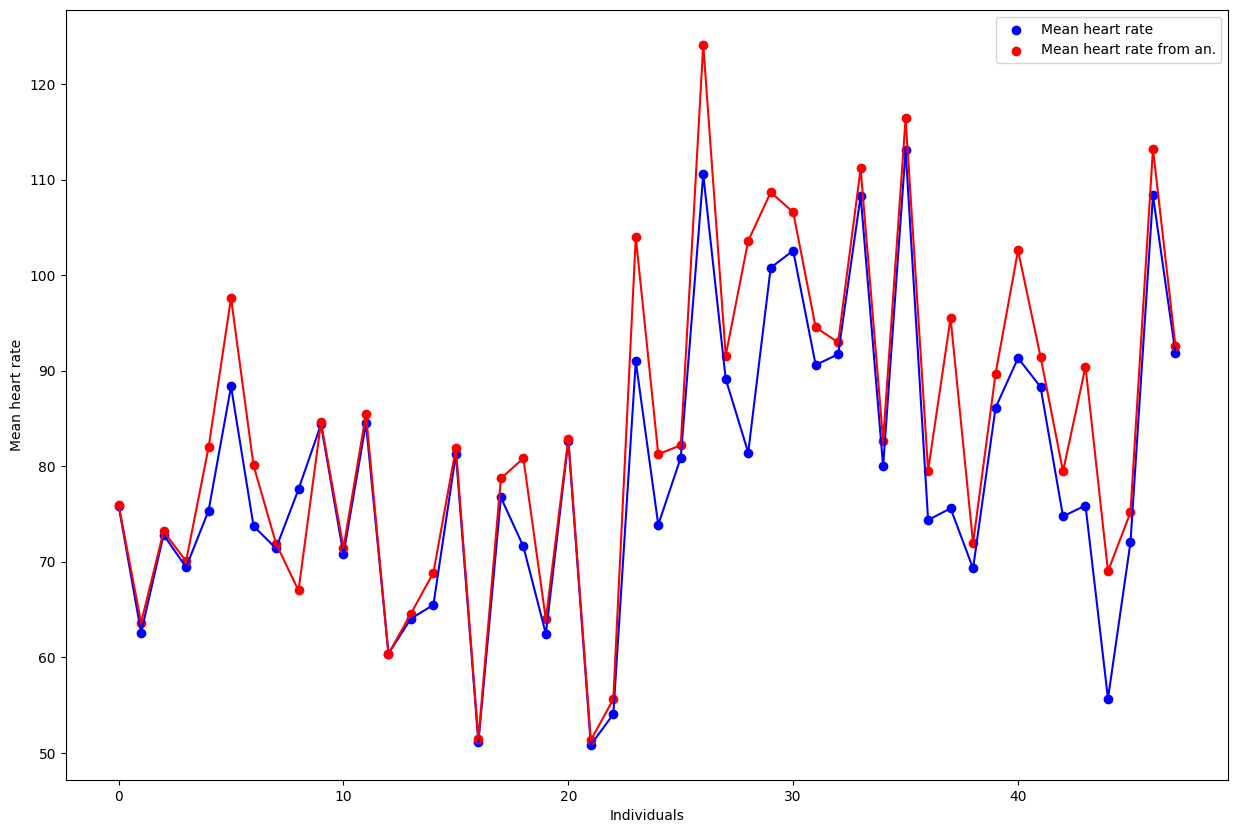

In [12]:
heart_rate_plot(patient, annotations, mean_hr)

In [13]:
tot_beats = count_beats(patient, annotations, num=True)

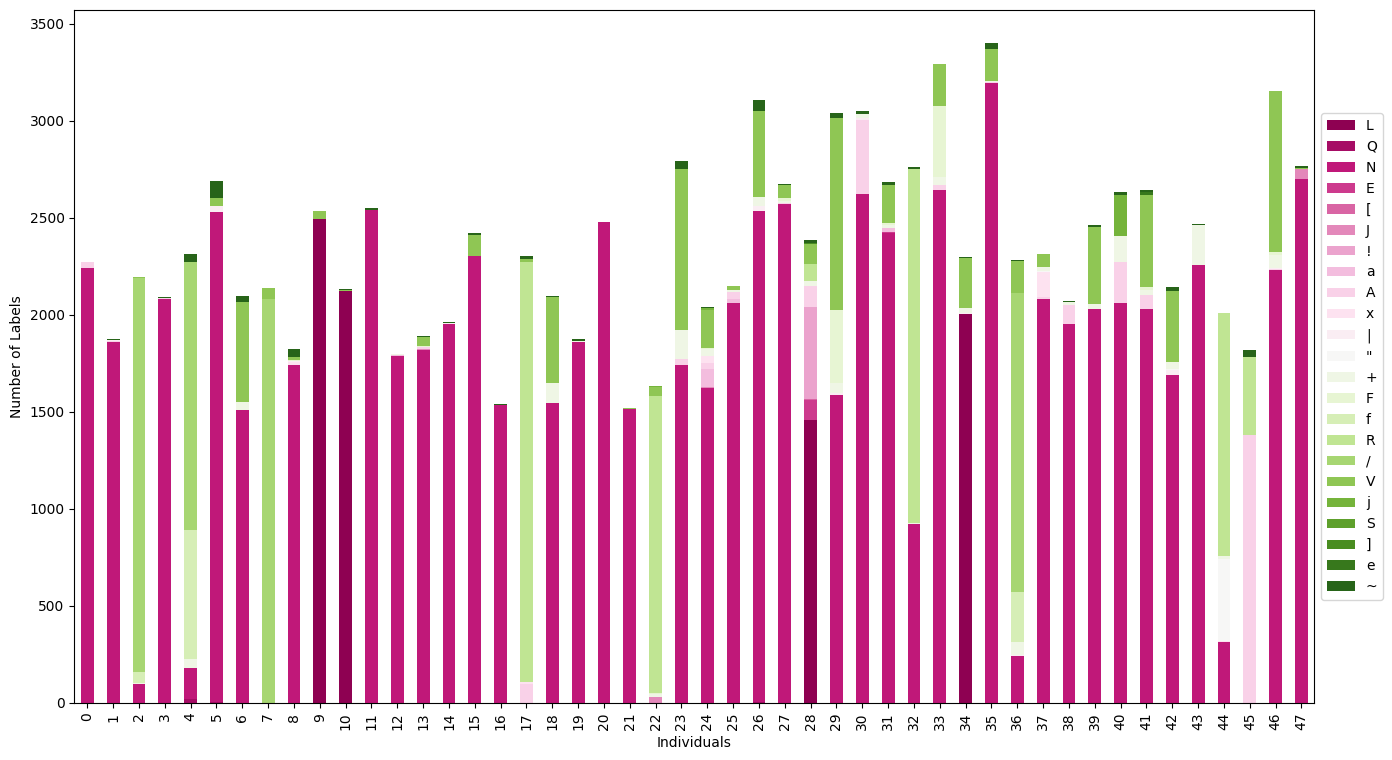

In [14]:
bar_plot(tot_beats, patient)

In [15]:
tot_beats = count_beats(patient, annotations, num=False)

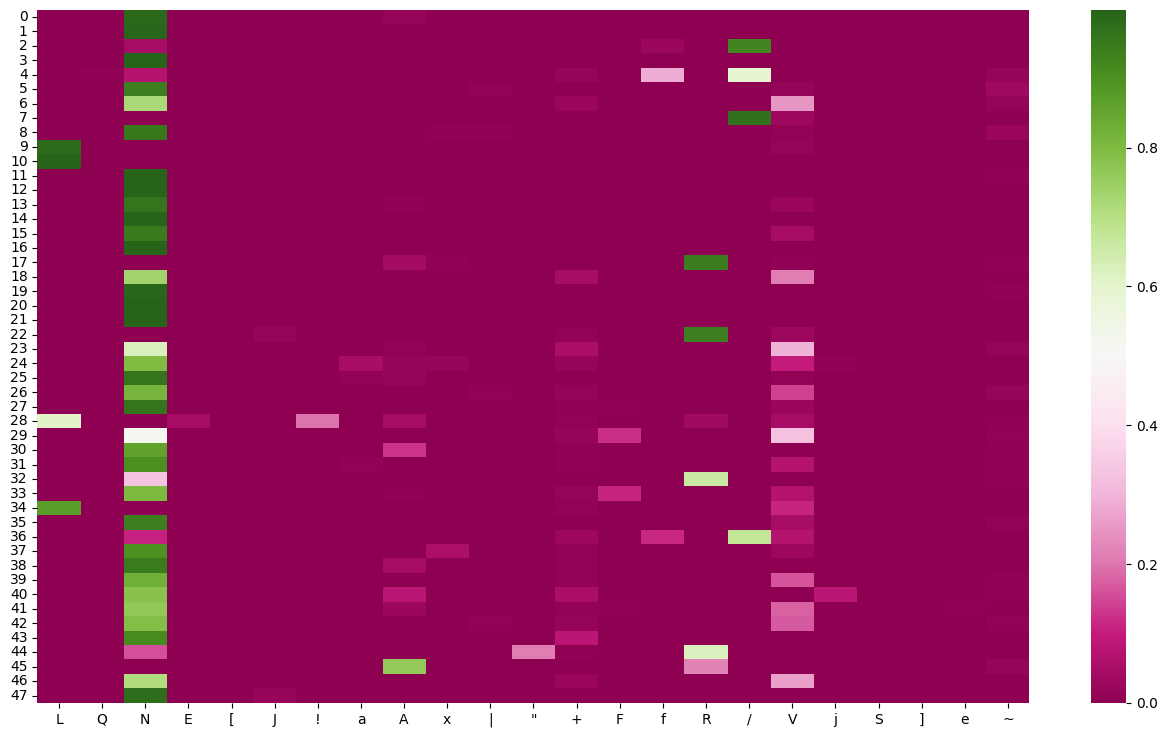

In [16]:
heatmap_plot(tot_beats)

In [17]:
normal_beats = 0.96
healthy, nonhealthy = split_healthy_not(rpeaks_dict, annotations, normal_beats)

In [18]:
healthy_sdnn = healthy["sdnn"]
nonhealthy_sdnn = nonhealthy["sdnn"]

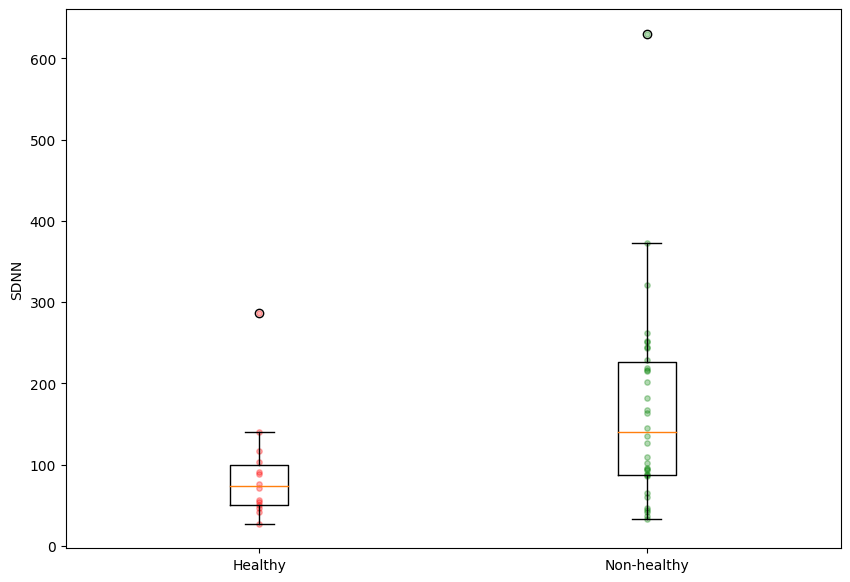

In [19]:
sdnn_plot(healthy_sdnn, nonhealthy_sdnn)

In [20]:
healthy_rmssd = healthy["rmssd"]
nonhealthy_rmssd = nonhealthy["rmssd"]

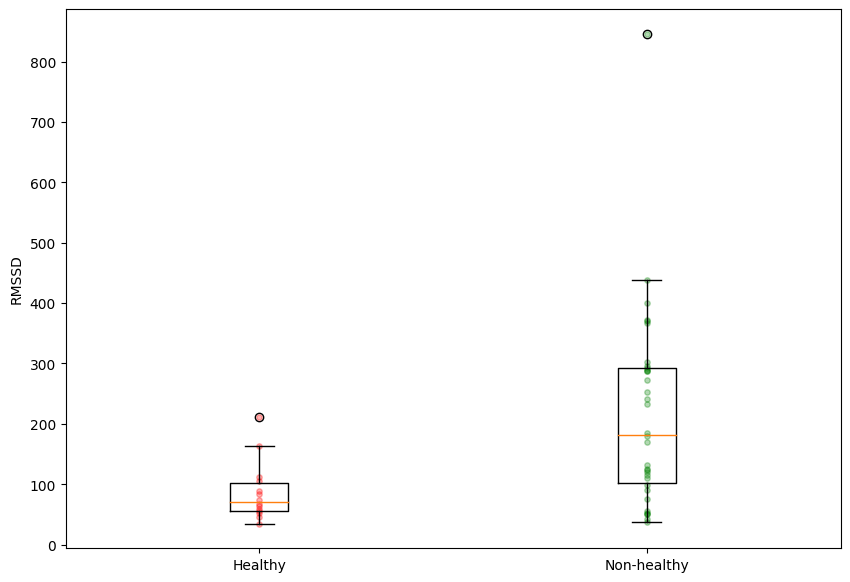

In [21]:
rmssd_plot(healthy_rmssd, nonhealthy_rmssd)

In [22]:
x, rr_manual, xx, rr_interpolated = interpolate(r_peaks, sampling_rate=360)

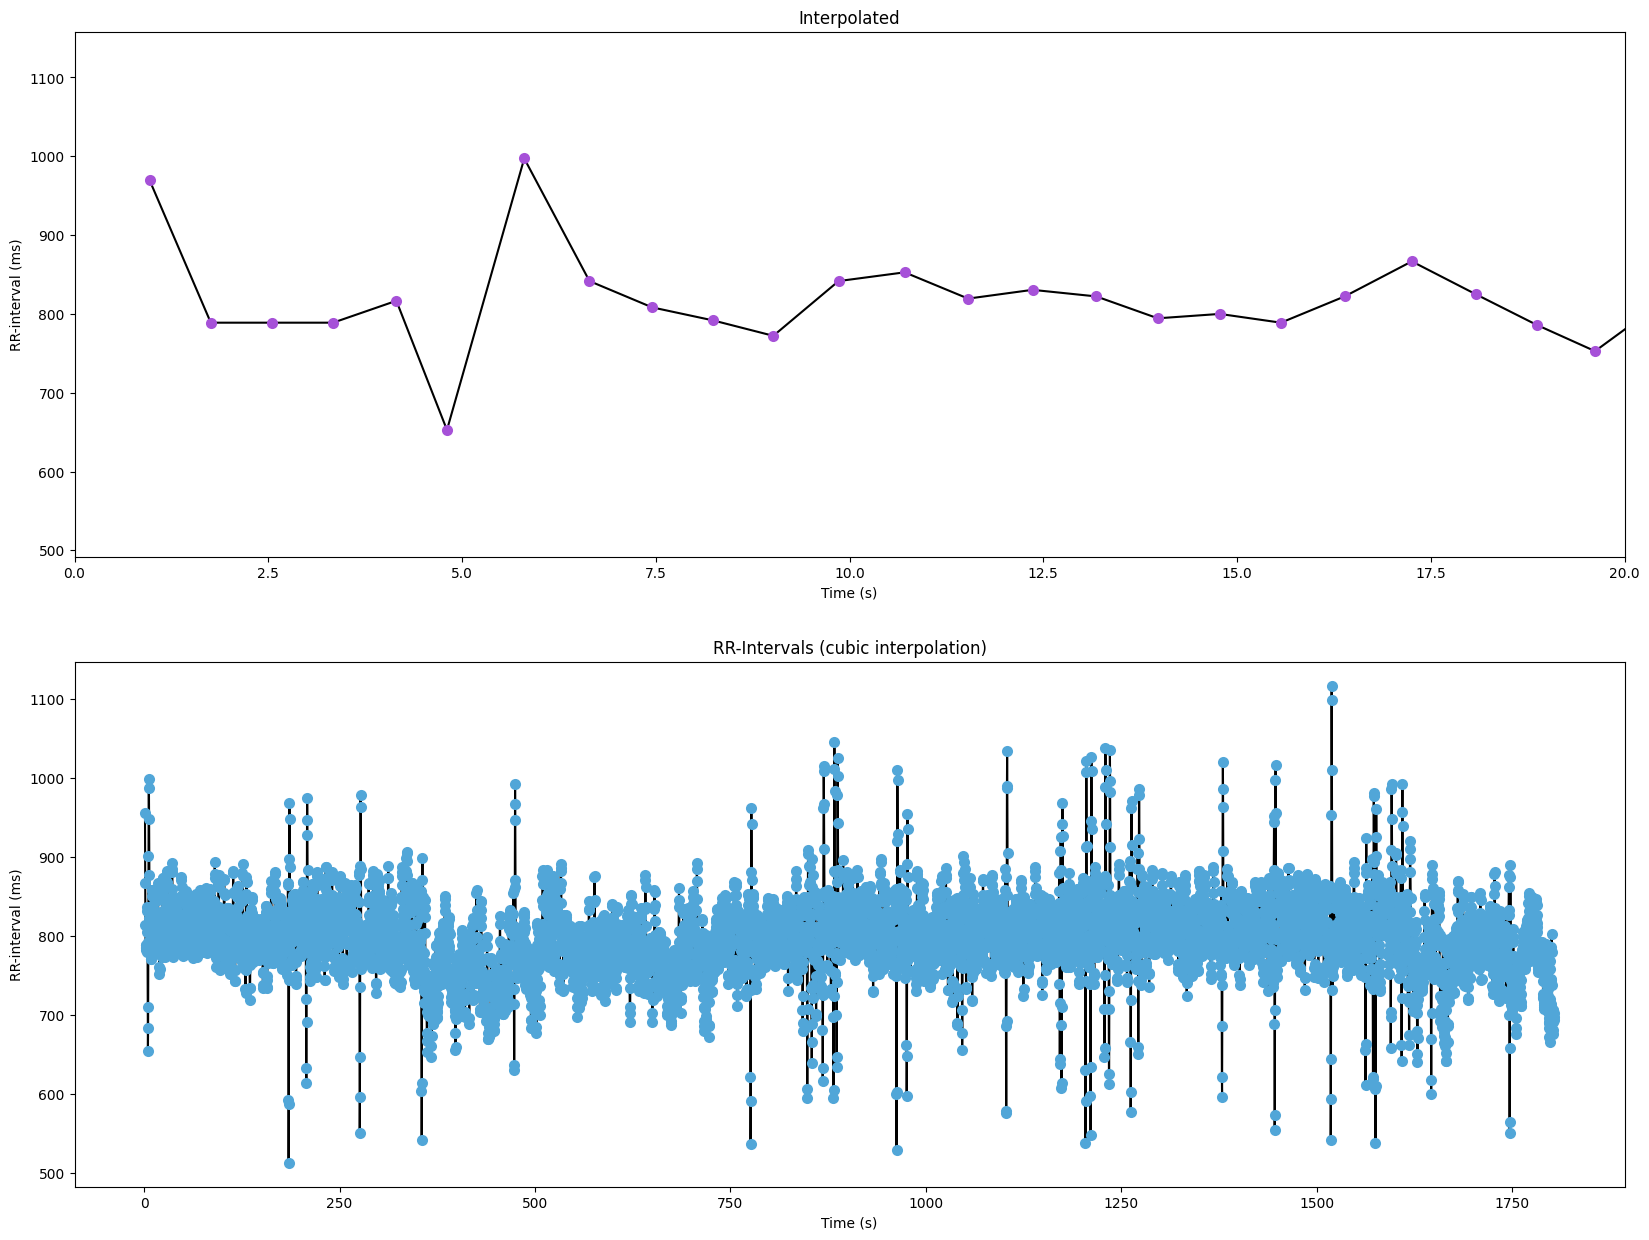

In [23]:
frequency_plot(x, rr_manual, xx, rr_interpolated)

In [7]:
rr_interpolated, results, fxx, pxx = frequency_domain(r_peaks)

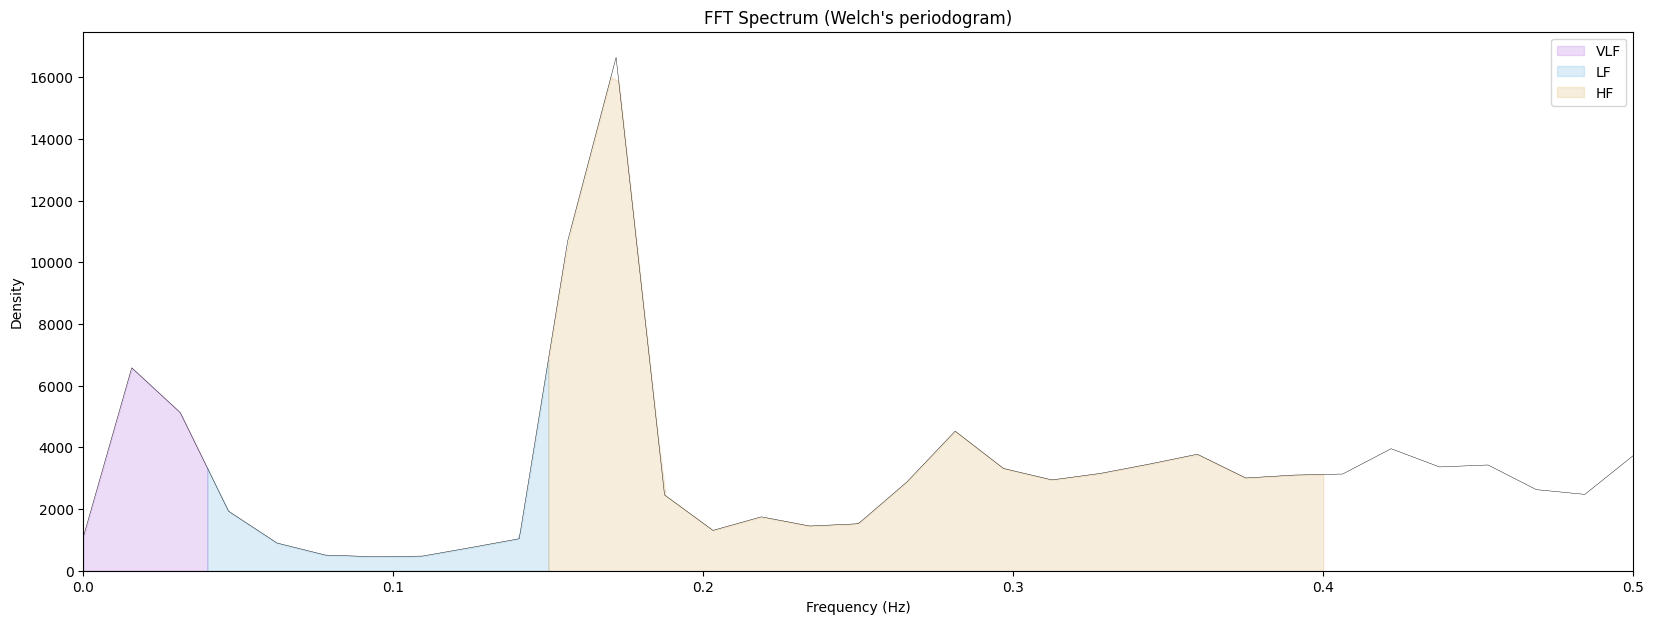

In [9]:
fft(fxx, pxx)

In [10]:
timedomain(r_peaks)

Time domain metrics - for given NN-intervals:
- Mean NN (ms): 286.09
- STD NN/SDNN (ms): 19.27
- Mean HR (beats/min): 75.87
- STD HR (beats/min): 5.51
- Min HR (beats/min): 53.20
- Max HR (beats/min): 114.89
- RMSSD (ms): 26.52
- SDNN: 19.27


In [6]:
print_fr_mes(r_peaks)

Frequency domain metrics:
- Power VLF (ms2): 151.35
- Power LF (ms2): 71.36
- Power HF (ms2): 922.81
- Power Total (ms2): 1145.52
- LF/HF: 0.08
- Peak VLF (Hz): 0.02
- Peak LF (Hz): 0.05
- Peak HF (Hz): 0.17
- Fraction LF (nu): 7.18
- Fraction HF (nu): 92.82
